In [49]:
# Use only the provided packages!
import math
import csv
import pandas as pd

from collections import Counter
import sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

In [34]:
train = pd.read_csv("aluminum_coldRoll_train.csv")
final_test = pd.read_csv("aluminum_coldRoll_testNoY.csv")

In [35]:
train

,ID,alloy,cutTemp,rollTemp,firstPassRollPressure,secondPassRollPressure,topEdgeMicroChipping,blockSource,machineRestart,contourDefNdx,clearPassNdx,y_passXtremeDurability
0,1,2224,med,med,500,350,no,MasterAlloys,no,5,2.013540,0
1,2,2324,low,high,575,325,no,Argon-Industries,no,2,1.887291,1
2,3,6063,med,low,450,350,no,L27,no,2,2.016347,1
3,4,2224,high,low,600,500,no,L27,no,5,1.887250,0
4,5,6061,low,low,525,425,no,Argon-Industries,no,5,2.156250,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159995,159996,2324,high,high,475,375,no,Argon-Industries,no,5,2.085409,0
159996,159997,7055,med,low,600,350,yes,L27,no,4,1.958085,1
159997,159998,6063,low,med,525,450,no,MasterAlloys,no,5,2.034765,0
159998,159999,7075-T6,med,high,575,400,no,MasterAlloys,no,2,2.061427,1


In [43]:
for i in range(len(train.columns)):
    if type(train[train.columns[i]][0]) == str:
        le = LabelEncoder()
        le.fit(train[train.columns[i]])
        train[train.columns[i]] = le.transform(train[train.columns[i]])

In [51]:
train

,ID,alloy,cutTemp,rollTemp,firstPassRollPressure,secondPassRollPressure,topEdgeMicroChipping,blockSource,machineRestart,contourDefNdx,clearPassNdx,y_passXtremeDurability
0,1,2,2,2,500,350,0,2,0,5,2.013540,0
1,2,3,1,0,575,325,0,0,0,2,1.887291,1
2,3,6,2,1,450,350,0,1,0,2,2.016347,1
3,4,2,0,1,600,500,0,1,0,5,1.887250,0
4,5,5,1,1,525,425,0,0,0,5,2.156250,0
...,...,...,...,...,...,...,...,...,...,...,...,...
159995,159996,3,0,0,475,375,0,0,0,5,2.085409,0
159996,159997,7,2,1,600,350,2,1,0,4,1.958085,1
159997,159998,6,1,2,525,450,0,2,0,5,2.034765,0
159998,159999,9,2,0,575,400,0,2,0,2,2.061427,1


In [45]:
mask = train.columns[train.columns != "y_passXtremeDurability"]

In [46]:
X = train[mask]
y = train["y_passXtremeDurability"]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

- train test split
- decision tree
- logistic regression
- knn

In [48]:
### ========== TODO : START ========== ###
# part h: investigate decision tree classifier with various depths
print('Investigating depths...')
train_errors = []
val_errors = []

best_d = 0
best_score = 0
for d in range(1,21):
    dt = DecisionTreeClassifier(criterion = "entropy", max_depth = d)
    dt.fit(X,y)
    
    # training errors
    train_error = 1 - dt.score(X,y)
    train_errors.append(train_error)

    # validation errors using cross_val_score
    cross_vals = cross_val_score(dt, X, y, cv = 10)
    avg_cross_val = sum(cross_vals)/10
    val_errors.append(1 - avg_cross_val)

    if avg_cross_val > best_score:
        best_score = avg_cross_val
        best_d = d
    
plt.plot(range(1,21), train_errors, color = "green", label = "training error")
plt.plot(range(1,21), val_errors, color = "blue", label = "validation error")
plt.xlabel("depth limits")
plt.ylabel("error")
plt.legend()
plt.show();

print(f"The best depth limit to use for this data is d = {best_d}, with validation error {round(1 - best_score,3)}.")
### ========== TODO : END ========== ###

Investigating depths...


NameError: name 'plt' is not defined

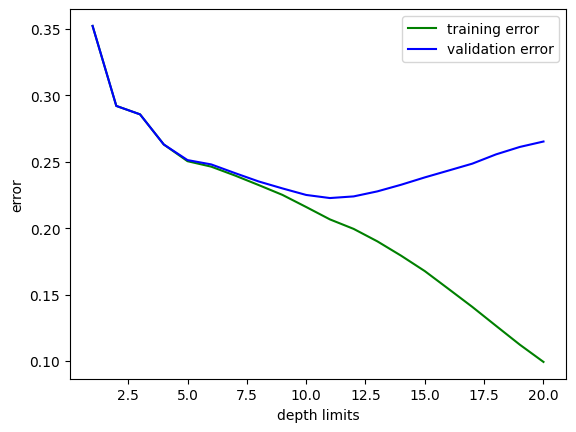

In [50]:
plt.plot(range(1,21), train_errors, color = "green", label = "training error")
plt.plot(range(1,21), val_errors, color = "blue", label = "validation error")
plt.xlabel("depth limits")
plt.ylabel("error")
plt.legend()
plt.show();